In [1]:
import os

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# cognac data and tools
#import cognac.insitu as iu
#import pynsitu as pyn

In [2]:
root_dir = "/Users/aponte/Current_Projects/taos/campagnes/taos_drifters0/raw"

---

## ships

In [3]:
file_h = os.path.join(root_dir, "ship_hydrophone_13052022.csv")
file_p = os.path.join(root_dir, "ship_parceque_13052022.csv")

In [4]:
def load_ship(file):
    with open(file, encoding="unicode_escape") as f:
        d = list(f.readlines())

    # replace NUL, strip whitespace from the end of the strings, split each string into a list
    d = [v.replace('\n', '').split(',') for v in d]

    columns = d[0]
    #print(columns)
    # ['ID', 'trksegID', 'lat', 'lon', 'ele', 'time', 'magvar', 'geoidheight', 'name', 'cmt', 'desc', 'src', 'sym', 'type', 'fix', 'sat', 'hdop', 'vdop', 'pdop', 'ageofdgpsdata', 'dgpsid', 'Temperature', 'Depth', 'wtemp', 'hr', 'cad', '']

    df = pd.DataFrame(d[1:], columns=columns)
    df["time"] = pd.to_datetime(df["time"])

    # only keep non zero columns
    selected_columns = ["time", "lon", "lat", "Depth", "Temperature"]
    #selected_columns = columns # dev 
    df = (df[selected_columns]
          .set_index("time")
          .replace("","0")
          .astype('float')
    )
    
    # rename critical columns
    df = df.rename(columns=dict(lon="longitude", lat="latitude", Depth="water_depth", Temperature="air_temperature"))
    
    return df

In [61]:
df_p = load_ship(file_p)
df_h = df = load_ship(file_h)

In [62]:
df_p

ID  trksegID   latitude  longitude  ele  \
time                                                                     
2002-09-27 04:51:11+00:00     1.0       1.0  49.336058  -0.459301  0.0   
2002-09-27 04:51:15+00:00     2.0       1.0  49.336058  -0.459301  0.0   
2002-09-27 04:54:32+00:00     3.0       1.0  49.335931  -0.459087  0.0   
2002-09-27 04:54:36+00:00     4.0       1.0  49.335924  -0.459064  0.0   
2002-09-27 04:54:40+00:00     5.0       1.0  49.335959  -0.458982  0.0   
...                           ...       ...        ...        ...  ...   
2002-09-27 09:20:54+00:00  2331.0       1.0  49.336119  -0.458737  0.0   
2002-09-27 09:20:56+00:00  2332.0       1.0  49.336119  -0.458737  0.0   
2002-09-27 09:20:58+00:00  2333.0       1.0  49.336119  -0.458737  0.0   
2002-09-27 09:20:59+00:00  2334.0       1.0  49.336119  -0.458737  0.0   
2002-09-27 09:22:28+00:00  2335.0       1.0  49.336120  -0.458736  0.0   

                           magvar  geoidheight  name  cmt  desc  ...  vdop  \
time                                                             ...         
2002-09-27 04:51:11+00:00     0.0          0.0   0.0  0.0   0.0  ...   0.0   
2002-09-27 04:51:15+00:00     0.0          0.0   0.0  0.0   0.0  ...   0.0   
2002-09-27 04:54:32+00:00     0.0          0.0   0.0  0.0   0.0  ...   0.0   
2002-09-27 04:54:36+00:00     0.0          0.0   0.0  0.0   0.0  ...   0.0   
2002-09-27 04:54:40+00:00     0.0          0.0   0.0  0.0   0.0  ...   0.0   
...                           ...          ...   ...  ...   ...  ...   ...   
2002-09-27 09:20:54+00:00     0.0          0.0   0.0  0.0   0.0  ...   0.0   
2002-09-27 09:20:56+00:00     0.0          0.0   0.0  0.0   0.0  ...   0.0   
2002-09-27 09:20:58+00:00     0.0          0.0   0.0  0.0   0.0  ...   0.0   
2002-09-27 09:20:59+00:00     0.0          0.0   0.0  0.0   0.0  ...   0.0   
2002-09-27 09:22:28+00:00     0.0          0.0   0.0  0.0   0.0  ...   0.0   

                           pdop  ageofdgpsdata  dgpsid  air_temperature  \
time                                                                      
2002-09-27 04:51:11+00:00   0.0            0.0     0.0         0.000000   
2002-09-27 04:51:15+00:00   0.0            0.0     0.0         7.903013   
2002-09-27 04:54:32+00:00   0.0            0.0     0.0         8.350822   
2002-09-27 04:54:36+00:00   0.0            0.0     0.0         8.350822   
2002-09-27 04:54:40+00:00   0.0            0.0     0.0         8.362019   
...                         ...            ...     ...              ...   
2002-09-27 09:20:54+00:00   0.0            0.0     0.0        13.220739   
2002-09-27 09:20:56+00:00   0.0            0.0     0.0        13.220739   
2002-09-27 09:20:58+00:00   0.0            0.0     0.0        13.220739   
2002-09-27 09:20:59+00:00   0.0            0.0     0.0        13.220739   
2002-09-27 09:22:28+00:00   0.0            0.0     0.0        13.243132   

                           water_depth  wtemp   hr  cad       
time                                                          
2002-09-27 04:51:11+00:00     0.000000    0.0  0.0  0.0  0.0  
2002-09-27 04:51:15+00:00     0.000000    0.0  0.0  0.0  0.0  
2002-09-27 04:54:32+00:00     0.000000    0.0  0.0  0.0  0.0  
2002-09-27 04:54:36+00:00     0.000000    0.0  0.0  0.0  0.0  
2002-09-27 04:54:40+00:00     0.000000    0.0  0.0  0.0  0.0  
...                                ...    ...  ...  ...  ...  
2002-09-27 09:20:54+00:00     1.565510    0.0  0.0  0.0  0.0  
2002-09-27 09:20:56+00:00     1.138554    0.0  0.0  0.0  0.0  
2002-09-27 09:20:58+00:00     2.229668    0.0  0.0  0.0  0.0  
2002-09-27 09:20:59+00:00     2.229668    0.0  0.0  0.0  0.0  
2002-09-27 09:22:28+00:00     2.205948    0.0  0.0  0.0  0.0  

[2335 rows x 26 columns]

In [21]:
df_p.geo.projection_reference

(-0.17252927330946768, 49.350218890872995)

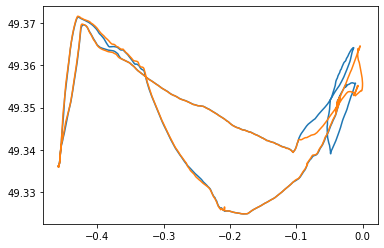

In [82]:
fig, ax = plt.subplots(1,1)
ax.plot(df_p.lon, df_p.lat)
ax.plot(df_h.lon, df_h.lat)

In [85]:
_df = df_p.reset_index()
_df["dt"] = _df["time"].diff()/pd.Timedelta("1s")

<AxesSubplot:>

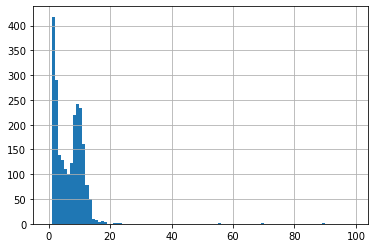

In [89]:
_df["dt"].hist(bins=np.arange(0,100,1))

In [92]:
_df["dl"] = np.sqrt( (_df["lon"].diff() *np.cos(np.pi/180.*_df.lat)) **2 + _df["lat"].diff()**2 ) * 111e3

(0.0, 20.0)

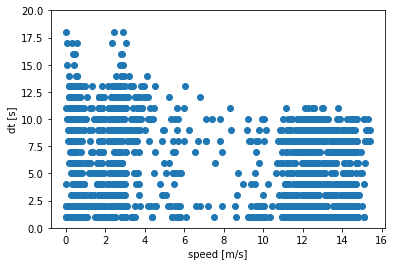

In [101]:
fig, ax = plt.subplots(1,1)

#ax.scatter(_df["dl"], _df["dt"])
#ax.set_xlabel("distance [m]")

ax.scatter(_df["dl"]/_df["dt"], _df["dt"])
ax.set_xlabel("speed [m/s]")

ax.set_ylabel("dt [s]")

#ax.set_xlim(0,1)
ax.set_ylim(0,20)

---
## CTD

In [3]:
file = "sonde_11.csv"

file_path = os.path.join(root_dir, file)

In [22]:
def read_sonde_lern(file, stype=0):

    with open(file, encoding="unicode_escape") as f:
        d = list(f.readlines())

    # replace NUL, strip whitespace from the end of the strings, split each string into a list
    d = [v.replace('\x00', '').strip().replace(",",".").split('\t') for v in d]

    # remove some empty rows
    d = [v for v in d if len(v) > 1]
    
    print(d[0])
    
    # 
    #d[0]:
    #['Date', 'Time', 'Site', 'Unit ID', 'User ID',
    # '°C-19K104425', 'mmHg-19C102825', 'DO %-20A103151', 'DO mg/L-20A103151', 
    # 'C-mS/cm-19K104425', 'SAL-PSU-19K104425', 'FNU-19M102353',
    # 'Chl RFU-19M101982', 'Chl ug/L-19M101982',
    # 'DEP m-19K105267']

    # benji deployments
    # ['Date', 'Time', 'Site', 'Unit ID', 'User ID', 
    # '°C-21A101173', 'mmHg-20L100404', 'DO %-21A100555', 'DO mg/L-21A100555', 
    # 'C-mS/cm-21A101173', 'SAL-PSU-21A101173', 
    # 'DEP m-20H100561']

    if stype==0:
        columns = ['Date', 'Time', 'Site', 'Unit ID', 'User ID',
         'temperature', 'pressure', 'DO_p', 'DO_mgL', 
         'conductivity', 'salinity', 'FNU',
         'Chl_RFU', 'Chl_ugL',
         'depth']
    elif stype==1:
        columns = ['Date', 'Time', 'Site', 'Unit ID', 'User ID',
         'temperature', 'pressure', 'DO_p', 'DO_mgL', 
         'conductivity', 'salinity',
         'depth']

    df = pd.DataFrame(d[1:], columns=columns)

    # convert column 0 and 1 to a datetime
    df['time'] = pd.to_datetime(df["Date"] + ' ' + df["Time"])

    df.set_index("time", inplace=True)
    df = df.drop(columns=["Date", "Time", "Site", "Unit ID", "User ID"])

    df = df.astype('float')
    
    return df

In [7]:
df = read_sonde_lern(file_path)

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

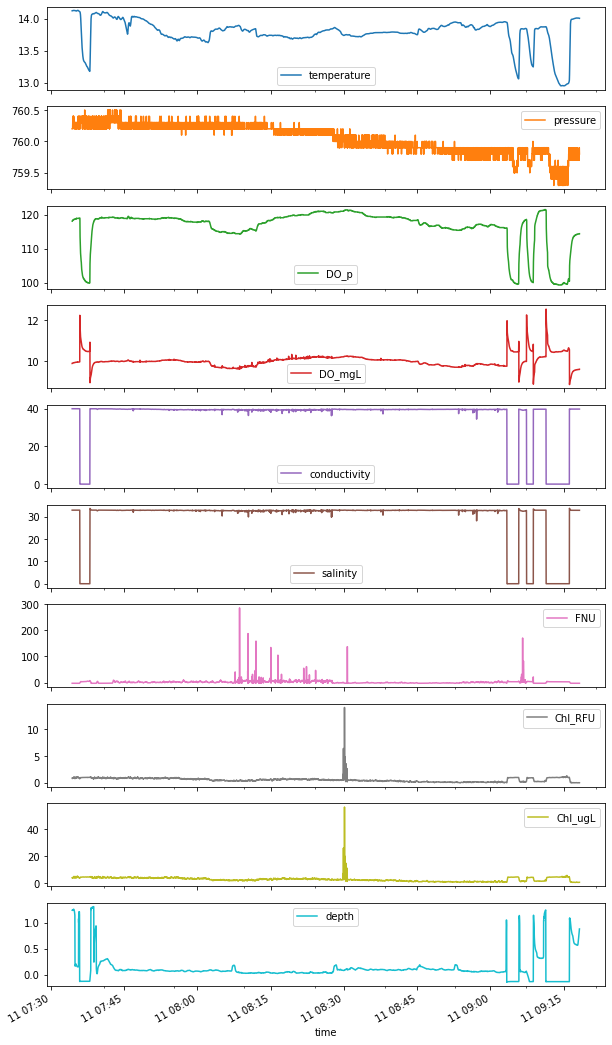

In [8]:
df.plot(subplots=True, figsize=(10,20))

In [9]:
# clean based on observed variables
df.loc[df.conductivity<30] = np.NaN

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

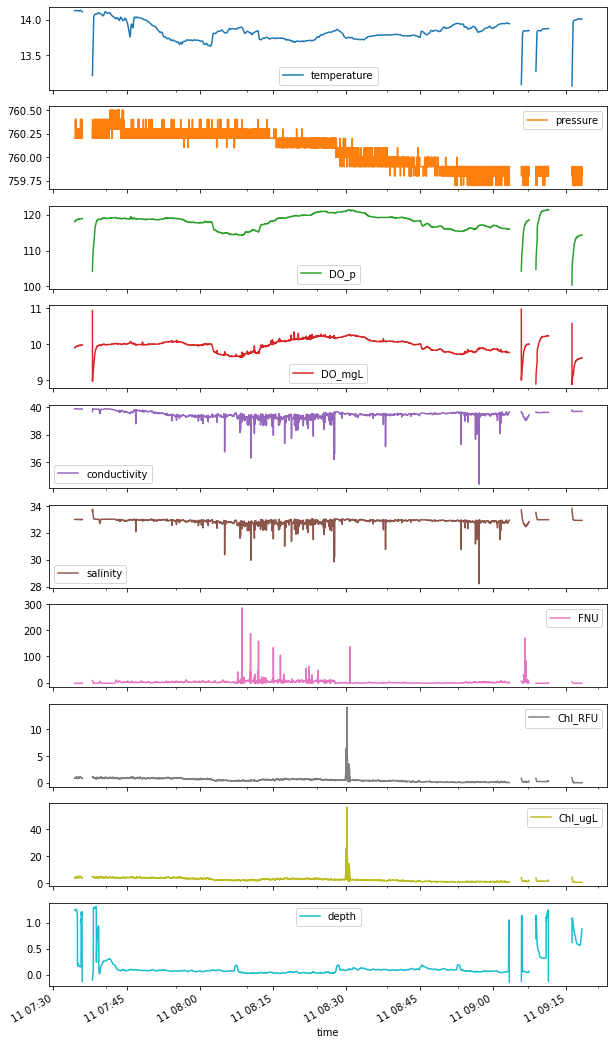

In [10]:
df.plot(subplots=True, figsize=(10,20))

array([[<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'pressure'}>,
        <AxesSubplot:title={'center':'DO_p'}>],
       [<AxesSubplot:title={'center':'DO_mgL'}>,
        <AxesSubplot:title={'center':'conductivity'}>,
        <AxesSubplot:title={'center':'salinity'}>],
       [<AxesSubplot:title={'center':'FNU'}>,
        <AxesSubplot:title={'center':'Chl_RFU'}>,
        <AxesSubplot:title={'center':'Chl_ugL'}>],
       [<AxesSubplot:title={'center':'depth'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

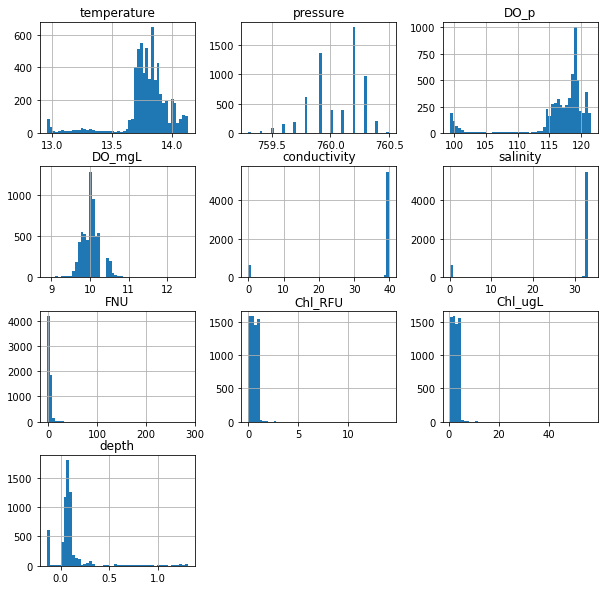

In [12]:
df.hist(bins=50, figsize=(10,10))

In [25]:
file = "sonde_benji_13.csv"
file_path = os.path.join(root_dir, file)
df = read_sonde_lern(file_path, stype=1)

['Date', 'Time', 'Site', 'Unit ID', 'User ID', 'ï¿½C-21A101173', 'mmHg-20L100404', 'DO %-21A100555', 'DO mg/L-21A100555', 'C-mS/cm-21A101173', 'SAL-PSU-21A101173', 'DEP m-20H100561']


array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>], dtype=object)

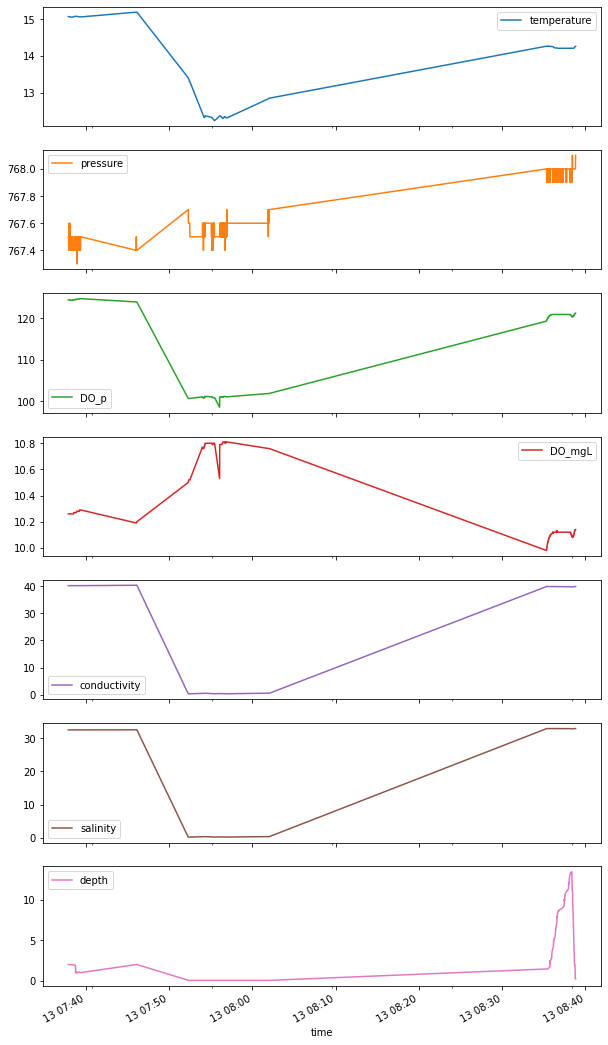

In [26]:
df.plot(subplots=True, figsize=(10,20))

---
## drifters

In [7]:
file = os.path.join(root_dir, "drifter-05_16_22-06_06.csv")

In [11]:
pd.read_csv(file, header=0, encoding="utf-8", )

D  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0    NaN         NaN         NaN         NaN         NaN         NaN   
1    NaN         NaN         NaN         NaN         NaN         NaN   
2    NaN         NaN         NaN         NaN         NaN         NaN   
3    NaN         NaN         NaN         NaN         NaN         NaN   
4    NaN         NaN         NaN         NaN         NaN         NaN   
...   ..         ...         ...         ...         ...         ...   
6891 NaN         NaN         NaN         NaN         NaN         NaN   
6892 NaN         NaN         NaN         NaN         NaN         NaN   
6893 NaN         NaN         NaN         NaN         NaN         NaN   
6894 NaN         NaN         NaN         NaN         NaN         NaN   
6895 NaN         NaN         NaN         NaN         NaN         NaN   

      Unnamed: 6  Unnamed: 7  Unnamed: 8  
0            NaN         NaN         NaN  
1            NaN         NaN         NaN  
2            NaN         NaN         NaN  
3            NaN         NaN         NaN  
4            NaN         NaN         NaN  
...          ...         ...         ...  
6891         NaN         NaN         NaN  
6892         NaN         NaN         NaN  
6893         NaN         NaN         NaN  
6894         NaN         NaN         NaN  
6895         NaN         NaN         NaN  

[6896 rows x 9 columns]

---
# play with accessors

https://pandas.pydata.org/docs/development/extending.html

In [30]:
import pyproj

from bokeh.io import output_notebook, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure

#@pd.api.extensions.register_dataframe_accessor("time")
#class TimeAccessor:
#    def __init__(self, pandas_obj):
#        self._validate(pandas_obj)
#        self._obj = pandas_obj

def xy2lonlat(x, y, proj):
    """ compute longitude/latitude from projected coordinates """
    _inv_dir = pyproj.enums.TransformDirection.INVERSE
    return proj.transform(x, y, direction=_inv_dir)

@pd.api.extensions.register_dataframe_accessor("geo")
class GeoAccessor:
    def __init__(self, pandas_obj):
        self._validate(pandas_obj)
        self._obj = pandas_obj
        self._reset_geo()
        
    def _reset_geo(self):
        """reset all variables related to geo"""
        self._geo_proj_ref=None
        self._geo_proj=None
        #self._obj.drop(columns=["x", "y"], errors="ignore", inplace=True)

    @staticmethod
    def _validate(obj):
        # verify there is a column latitude and a column longitude
        if "latitude" not in obj.columns or "longitude" not in obj.columns:
            raise AttributeError("Must have 'latitude' and 'longitude'.")

    @property
    def projection_reference(self):
        if self._geo_proj_ref is None:
            # return the geographic center point of this DataFrame
            lat = self._obj.latitude
            lon = self._obj.longitude
            self._geo_proj_ref = (float(lon.mean()), float(lat.mean()))
        return self._geo_proj_ref

    def set_projection_reference(self, ref, reset=True):
        """ set projection reference point, (lon, lat) tuple"""
        if reset:
            self._reset_geo()
        self._geo_proj_ref = ref
    
    @property
    def projection(self):
        if self._geo_proj is None:
            lonc, latc = self.projection_reference
            #print(lonc, latc)
            self._geo_proj = pyproj.Proj(proj="aeqd", lat_0=latc, lon_0=lonc, datum="WGS84", units="m")
        return self._geo_proj
    
    def compute_xy(self, overwrite=False):
        """add (x,y) projection to object"""
        d = self._obj
        if "x" not in d.columns or "y" not in d.columns or overwrite:
            #print("here")
            d["x"], d["y"] = self.projection.transform(d.longitude, d.latitude)

    def compute_lonlat(self):
        """update longitude and latitude from projected coordinates """
        d = self._obj
        assert ("x" in d.columns) and ("y" in d.columns), "x/y coordinates must be available"        
        d["longitude"], d["latitude"] = xy2lonlat(d.x, d.y, self.projection)

    def resample(self,
                 rule,
                 interpolate=False,
                 #inplace=True,
                 **kwargs,
        ):
        ''' temporal resampling
        https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

        Parameters
        ----------
        rule: DateOffset, Timedelta or str
            Passed to pandas.DataFrame.resample, examples:
                - '10T': 10 minutes
                - '10S': 10 seconds
        inplace: boolean, optional
            turn inplace resampling on, default is False
        interpolate: boolean, optional
            turn on interpolation for upsampling
        kwargs:
            passed to resample
        '''
        # project first
        self.compute_xy()
        #
        d = self._obj
        d_out = d.resample(rule, **kwargs).mean()
        if interpolate:
            d_out = d_out.interpolate(method='linear')
        # recompute lon/lat from projected coordinates
        d_out["longitude"], d_out["latitude"] = xy2lonlat(d_out.x, d_out.y, self.projection)
        d_out = d_out.drop(columns=["x", "y"])
        # inplace modification does not work at the moment, not sure why
        #if inplace:
        #    #d[["longitude", "latitude"]] = d_out[["longitude", "latitude"]]
        #    self._obj = d_out
        #else:
        return d_out
        
    def compute_velocities(self, time="index", inplace=True):
        """ compute velocity """
        d = self._obj
        # project
        self.compute_xy()
        # remove duplicates
        d = d[~d.index.duplicated(keep='first')]
        if time=="index":
            dt = pd.Series(d.index).diff()/pd.Timedelta("1s")
            dt.index = d.index
            d["dt"] = dt
        else:
            d["dt"] = d[time].diff()/pd.Timedelta("1s")
        d["u"] = d.x.diff()/d.dt
        d["v"] = d.y.diff()/d.dt
        d["velocity"] = np.sqrt(d.u**2+d.v**2)
        if inplace:
            self._obj[["u", "v", "velocity"]] = d[["u", "v", "velocity"]]
        else:
            return d
        
    def plot_lonlat(self):
        """ simple lon/lat plot """
        # plot this array's data on a map, e.g., using Cartopy
        d = self._obj
        fig, ax = plt.subplots(1,1)
        ax.plot(d.longitude, d.latitude)
        
    def plot_bokeh(self, unit=None, rule=None):
        """ bokeh plot"""
        
        if rule is not None:
            d = self.resample(rule)
        else:
            d = self._obj
        
        if 'velocity' not in d.columns:
            d.geo.compute_velocities()
        
        output_notebook()
        TOOLS = 'pan,wheel_zoom,box_zoom,reset,help'

        # line specs
        lw = 3
        c = 'black'
        
        def _add_start_end(s, y):
            #_y = y.iloc[y.index.get_loc(_d.start.time), method='nearest')]
            if unit is not None:
                for _d in unit:
                    s.line(x=[_d.start.time, _d.start.time],
                           y=[y.min(), y.max()],
                           color='cadetblue', line_width=2)
                    s.line(x=[_d.end.time, _d.end.time],
                           y=[y.min(), y.max()],
                           color='salmon', line_width=2)

        # create a new plot and add a renderer
        s1 = figure(tools=TOOLS,
                    plot_width=300, plot_height=300,
                    title='longitude',
                    x_axis_type='datetime')
        s1.line('time', 'longitude', source=d, line_width=lw, color=c)
        s1.add_tools(HoverTool(
            tooltips=[('Time','@time{%F %T}'),('longitude','@{longitude}{0.000f}'),],
            formatters={'@time': 'datetime','@longitude' : 'printf',},
            mode='vline'
            ))
        _add_start_end(s1, d['longitude'])
        #
        s2 = figure(tools=TOOLS,
                    plot_width=300, plot_height=300,
                    title='latitude',
                    x_axis_type='datetime',
                    x_range=s1.x_range
                    )
        s2.line('time', 'latitude', source=d, line_width=lw, color=c)
        s2.add_tools(HoverTool(
            tooltips=[('Time','@time{%F %T}'),('latitude','@{latitude}{0.000f}'),],
            formatters={'@time': 'datetime','@latitude' : 'printf',},
            mode='vline'
            ))
        _add_start_end(s2, d['latitude'])
        #
        s3 = figure(tools=TOOLS,
                    plot_width=300, plot_height=300,
                    title='speed',
                    x_axis_type='datetime',
                    x_range=s1.x_range
                    )
        s3.line('time', 'velocity', source=d, line_width=lw, color=c)
        s3.add_tools(HoverTool(
            tooltips=[('Time','@time{%F %T}'),('Velocity','@{velocity}{0.00f}'),],
            formatters={'@time': 'datetime','@velocity' : 'printf',},
            mode='vline'
            ))
        _add_start_end(s3, d['velocity'])

        p = gridplot([[s1, s2, s3]])
        show(p)
        
        
    def plot_bokeh_map(self, unit=None, rule=None):
        """ bokeh plot"""
        
        if rule is not None:
            d = self.resample(rule)
        else:
            d = self._obj
        self.compute_xy()        
        
        output_notebook()
        TOOLS = 'pan,wheel_zoom,box_zoom,reset,help'

        # line specs
        lw = 3
        c = 'black'
        
        # create a new plot and add a renderer
        s1 = figure(tools=TOOLS,
                    plot_width=400, plot_height=300,
                    title='map',
                    match_aspect=True, # if projected for equal axis
                    #x_axis_type='datetime',
                   )
        s1.line('x', 'y', source=d, line_width=lw, color=c)
        s1.add_tools(HoverTool(
            tooltips=[('Time','@time{%F %T}'),('longitude','@{longitude}{0.000f}'), ('latitude','@{latitude}{0.000f}')],
            formatters={'@time': 'datetime','@longitude' : 'printf', '@latitude' : 'printf'},
            #mode='vline'
            ))

        p = gridplot([[s1,]])
        show(p)

/var/folders/pb/vp119fcj1pn3dc3x2dz4dkt80000gn/T/ipykernel_29443/1595460598.py:21: UserWarning: registration of accessor <class '__main__.GeoAccessor'> under name 'geo' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class GeoAccessor:


In [34]:
df = load_ship(file_h)

In [35]:
df = df.geo.resample("1s", interpolate=True)
#df.geo.compute_velocities()

In [39]:
df

longitude   latitude  water_depth  air_temperature  \
time                                                                            
2002-09-27 05:01:59+00:00  -0.459236  49.336066     0.000000         0.000000   
2002-09-27 05:02:00+00:00  -0.459233  49.336065     0.000000         3.929116   
2002-09-27 05:02:01+00:00  -0.459230  49.336064     0.000000         7.858232   
2002-09-27 05:02:02+00:00  -0.459230  49.336063     0.000000         7.863536   
2002-09-27 05:02:03+00:00  -0.459229  49.336063     0.000000         7.868839   
...                              ...        ...          ...              ...   
2002-09-27 09:27:56+00:00  -0.458597  49.335941     3.164227        13.545404   
2002-09-27 09:27:57+00:00  -0.458601  49.335935     3.167785        13.545404   
2002-09-27 09:27:58+00:00  -0.458605  49.335929     3.171343        13.545404   
2002-09-27 09:27:59+00:00  -0.458609  49.335924     3.174901        13.545404   
2002-09-27 09:28:00+00:00  -0.458613  49.335918     3.178459        13.545404   

                                      x            y         u         v  \
time                                                                       
2002-09-27 05:01:59+00:00 -20703.085126 -1212.982265       NaN       NaN   
2002-09-27 05:02:00+00:00 -20702.899925 -1213.141439  0.185201 -0.159175   
2002-09-27 05:02:01+00:00 -20702.714723 -1213.300614  0.185201 -0.159175   
2002-09-27 05:02:02+00:00 -20702.675427 -1213.337854  0.039296 -0.037240   
2002-09-27 05:02:03+00:00 -20702.636130 -1213.375095  0.039296 -0.037240   
...                                 ...          ...       ...       ...   
2002-09-27 09:27:56+00:00 -20656.712260 -1227.123375 -0.290255 -0.641668   
2002-09-27 09:27:57+00:00 -20657.002516 -1227.765043 -0.290255 -0.641668   
2002-09-27 09:27:58+00:00 -20657.292771 -1228.406711 -0.290255 -0.641668   
2002-09-27 09:27:59+00:00 -20657.583027 -1229.048379 -0.290255 -0.641668   
2002-09-27 09:28:00+00:00 -20657.873282 -1229.690047 -0.290255 -0.641668   

                           velocity  
time                                 
2002-09-27 05:01:59+00:00       NaN  
2002-09-27 05:02:00+00:00  0.244205  
2002-09-27 05:02:01+00:00  0.244205  
2002-09-27 05:02:02+00:00  0.054139  
2002-09-27 05:02:03+00:00  0.054139  
...                             ...  
2002-09-27 09:27:56+00:00  0.704263  
2002-09-27 09:27:57+00:00  0.704263  
2002-09-27 09:27:58+00:00  0.704263  
2002-09-27 09:27:59+00:00  0.704263  
2002-09-27 09:28:00+00:00  0.704263  

[15962 rows x 9 columns]

In [37]:
df.geo.plot_bokeh()

Loading BokehJS ...

In [36]:
df.geo.plot_bokeh_map()

Loading BokehJS ...

In [38]:
-.1*60

-6.0

In [284]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap

#output_file("gmap.html")

map_options = GMapOptions(lat=30.2861, lng=-97.7394, map_type="roadmap", zoom=11)

# For GMaps to function, Google requires you obtain and enable an API key:
#
#     https://developers.google.com/maps/documentation/javascript/get-api-key
#
# Replace the value below with your personal API key:
p = gmap("GOOGLE_API_KEY", map_options, title="Austin")

source = ColumnDataSource(
    data=df
)

p.circle(x="longitude", y="latitude", size=15, fill_color="blue", fill_alpha=0.8, source=source)

show(p)

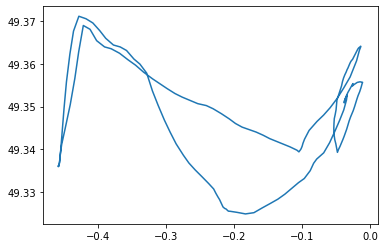

In [213]:
_df.geo.plot()

<AxesSubplot:xlabel='time'>

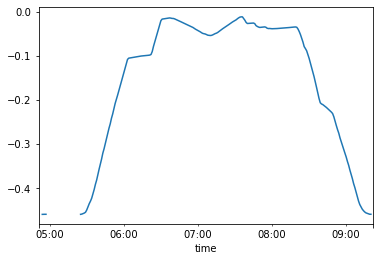

In [108]:
_df.longitude.plot()